In [ ]:
!python --version

Python 3.10.12


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import jaccard_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing the dataset
df = pd.read_csv("/content/drive/MyDrive/BreastCancer/Breast_Cancer.csv")
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [ ]:
#Checking the shape of the dataset
df.shape

(4024, 16)

In [ ]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

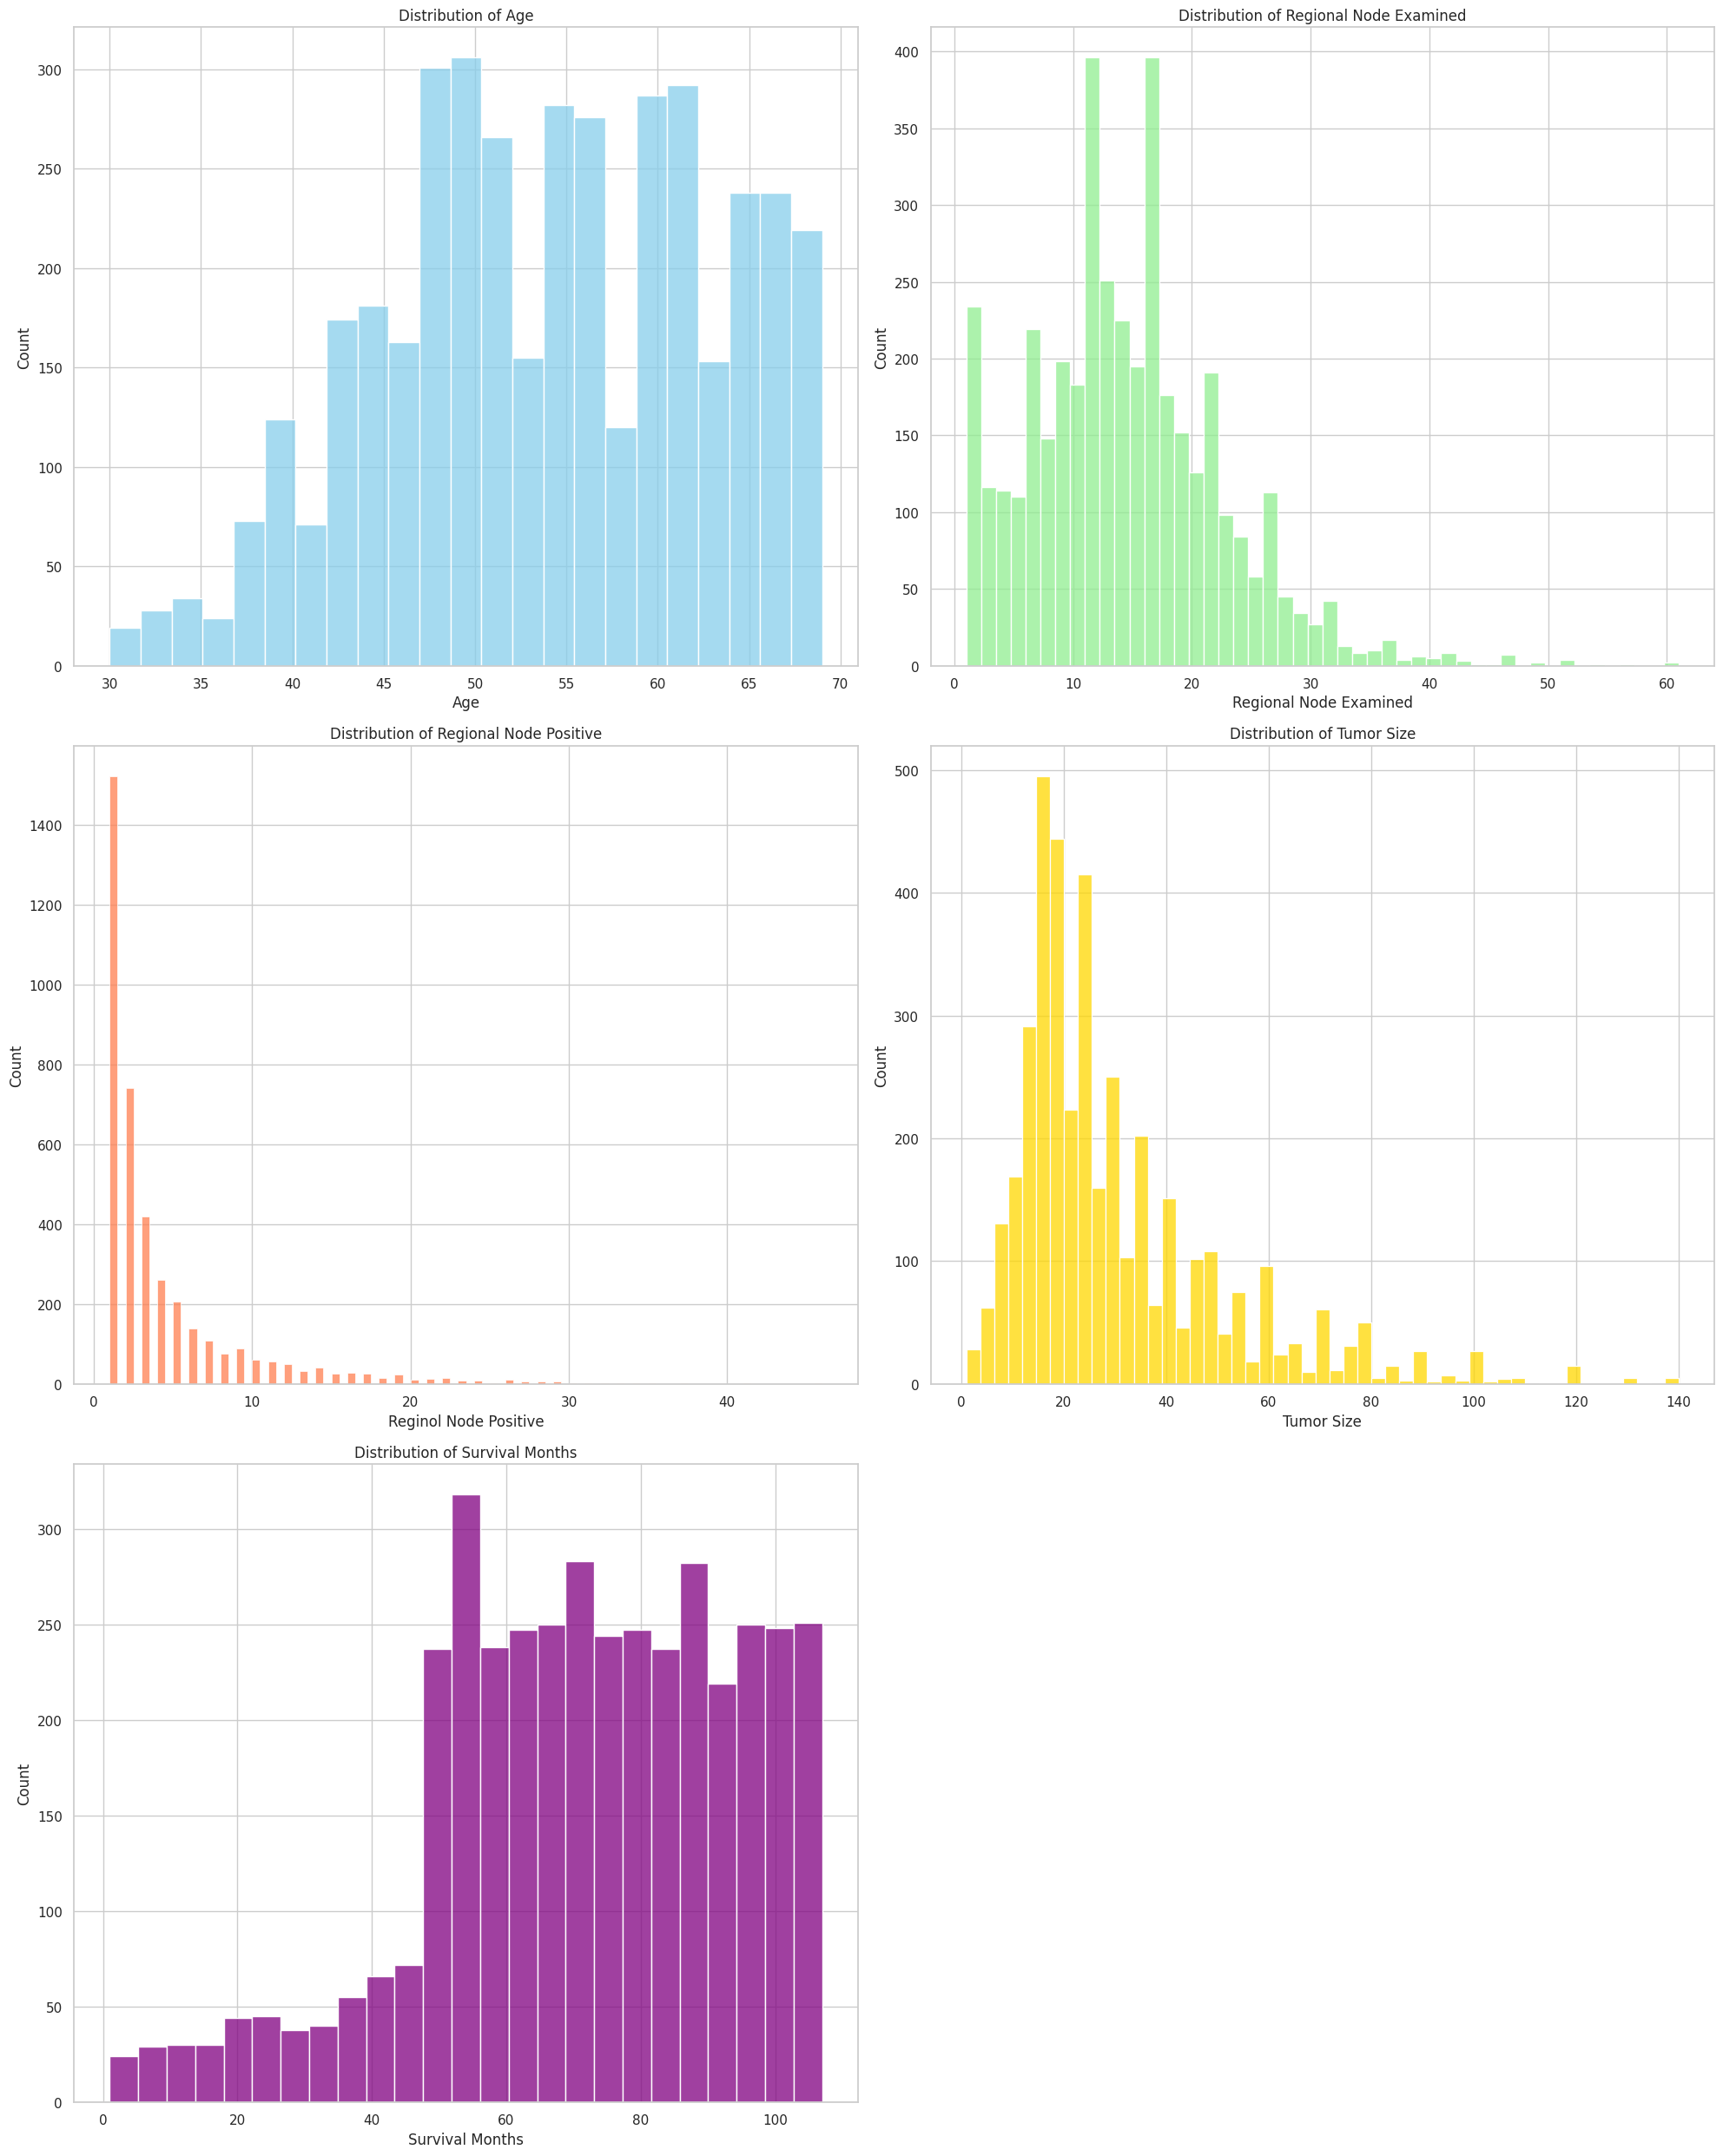

In [ ]:
#Univariate analysis (Numerical Attribute)
sns.set_theme(style="whitegrid", palette="pastel")

fig, axes = plt.subplots(3, 2, figsize=(20, 25))
axes = axes.flatten()

sns.histplot(df['Age'], kde=False, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Age')

sns.histplot(df['Regional Node Examined'], kde=False, ax=axes[1], color='lightgreen')
axes[1].set_title('Distribution of Regional Node Examined')

sns.histplot(df['Reginol Node Positive'], kde=False, ax=axes[2], color='coral')
axes[2].set_title('Distribution of Regional Node Positive')

sns.histplot(df['Tumor Size'], kde=False, ax=axes[3], color='gold')
axes[3].set_title('Distribution of Tumor Size')

sns.histplot(df['Survival Months'], kde=False, ax=axes[4], color='purple')
axes[4].set_title('Distribution of Survival Months')

fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

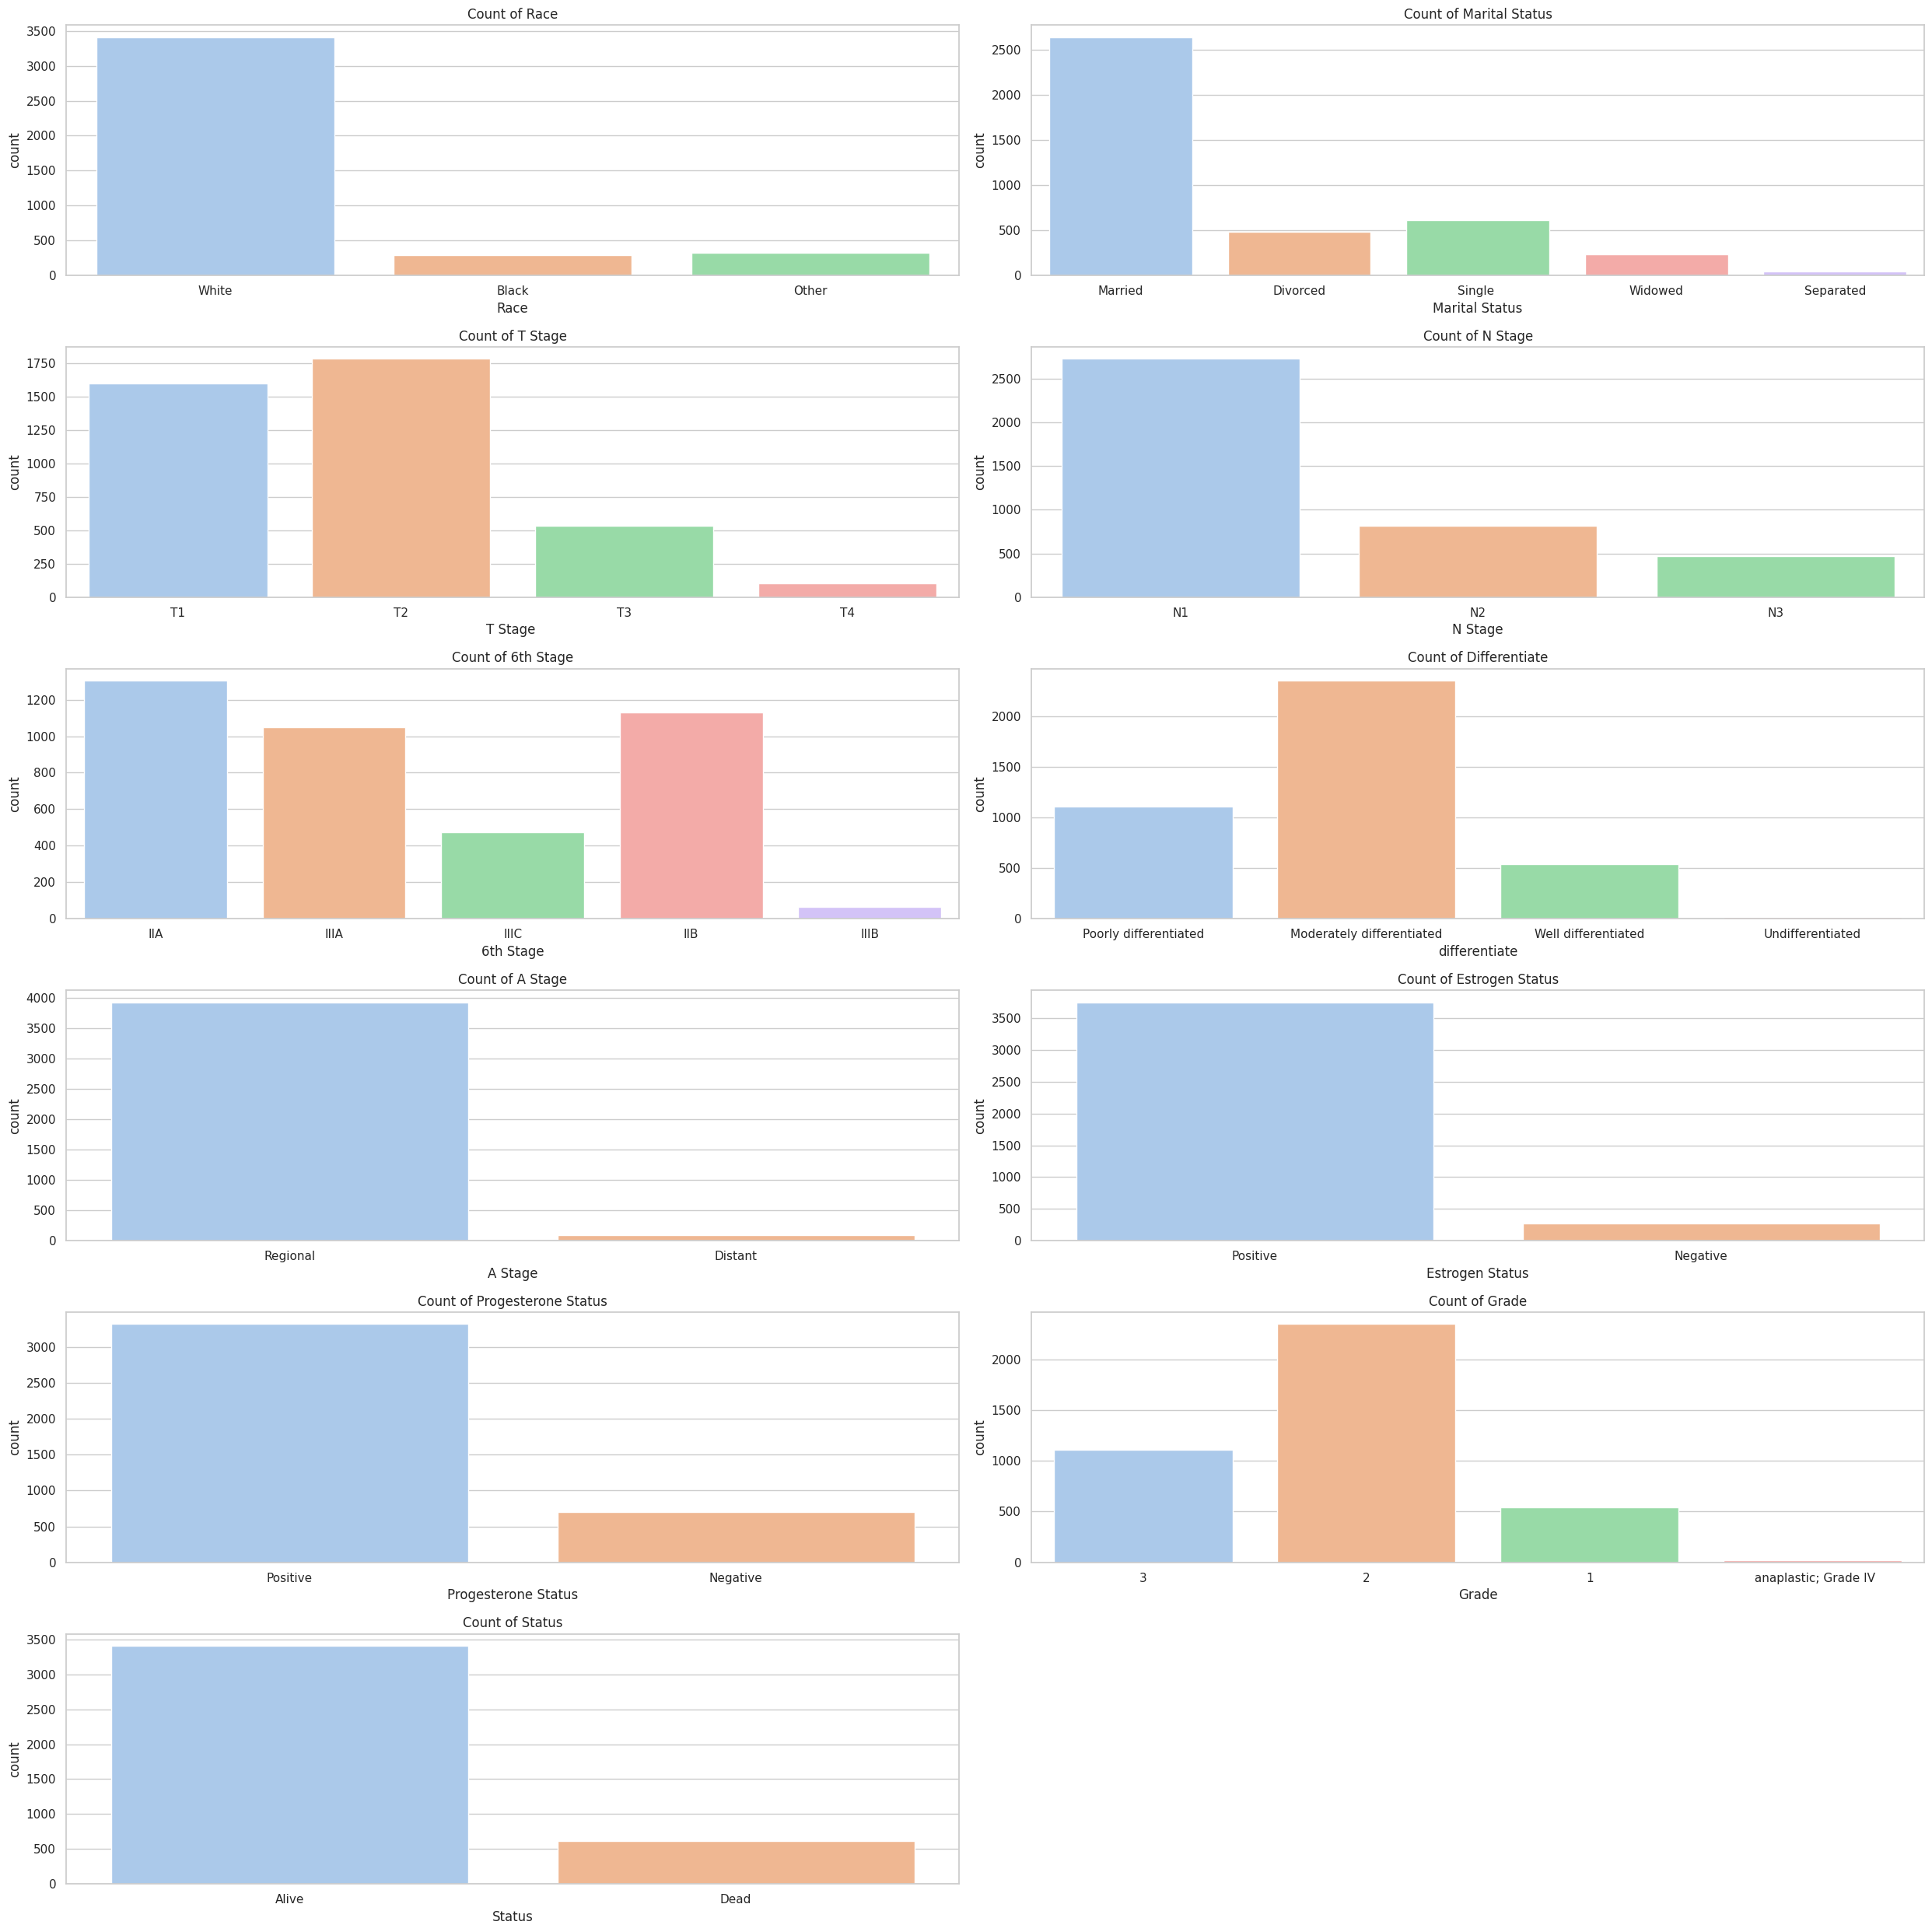

In [ ]:
#Univariate analysis (Categorical)
sns.set_theme(style="whitegrid", palette="pastel")

fig, axes = plt.subplots(6, 2, figsize=(25, 25))
axes = axes.flatten()  # Flatten the axes array for easier indexing

sns.countplot(x='Race', palette='pastel', data=df, ax=axes[0])
axes[0].set_title('Count of Race')

sns.countplot(x='Marital Status', palette='pastel', data=df, ax=axes[1])
axes[1].set_title('Count of Marital Status')

sns.countplot(x='T Stage ', palette='pastel', data=df, ax=axes[2])
axes[2].set_title('Count of T Stage')

sns.countplot(x='N Stage', palette='pastel', data=df, ax=axes[3])
axes[3].set_title('Count of N Stage')

sns.countplot(x='6th Stage', palette='pastel', data=df, ax=axes[4])
axes[4].set_title('Count of 6th Stage')

sns.countplot(x='differentiate', palette='pastel', data=df, ax=axes[5])
axes[5].set_title('Count of Differentiate')

sns.countplot(x='A Stage', palette='pastel', data=df, ax=axes[6])
axes[6].set_title('Count of A Stage')

sns.countplot(x='Estrogen Status', palette='pastel', data=df, ax=axes[7])
axes[7].set_title('Count of Estrogen Status')

sns.countplot(x='Progesterone Status', palette='pastel', data=df, ax=axes[8])
axes[8].set_title('Count of Progesterone Status')

sns.countplot(x='Grade', palette='pastel', data=df, ax=axes[9])
axes[9].set_title('Count of Grade')

sns.countplot(x='Status', palette='pastel', data=df, ax=axes[10])
axes[10].set_title('Count of Status')

fig.delaxes(axes[11])

plt.tight_layout()
plt.show()


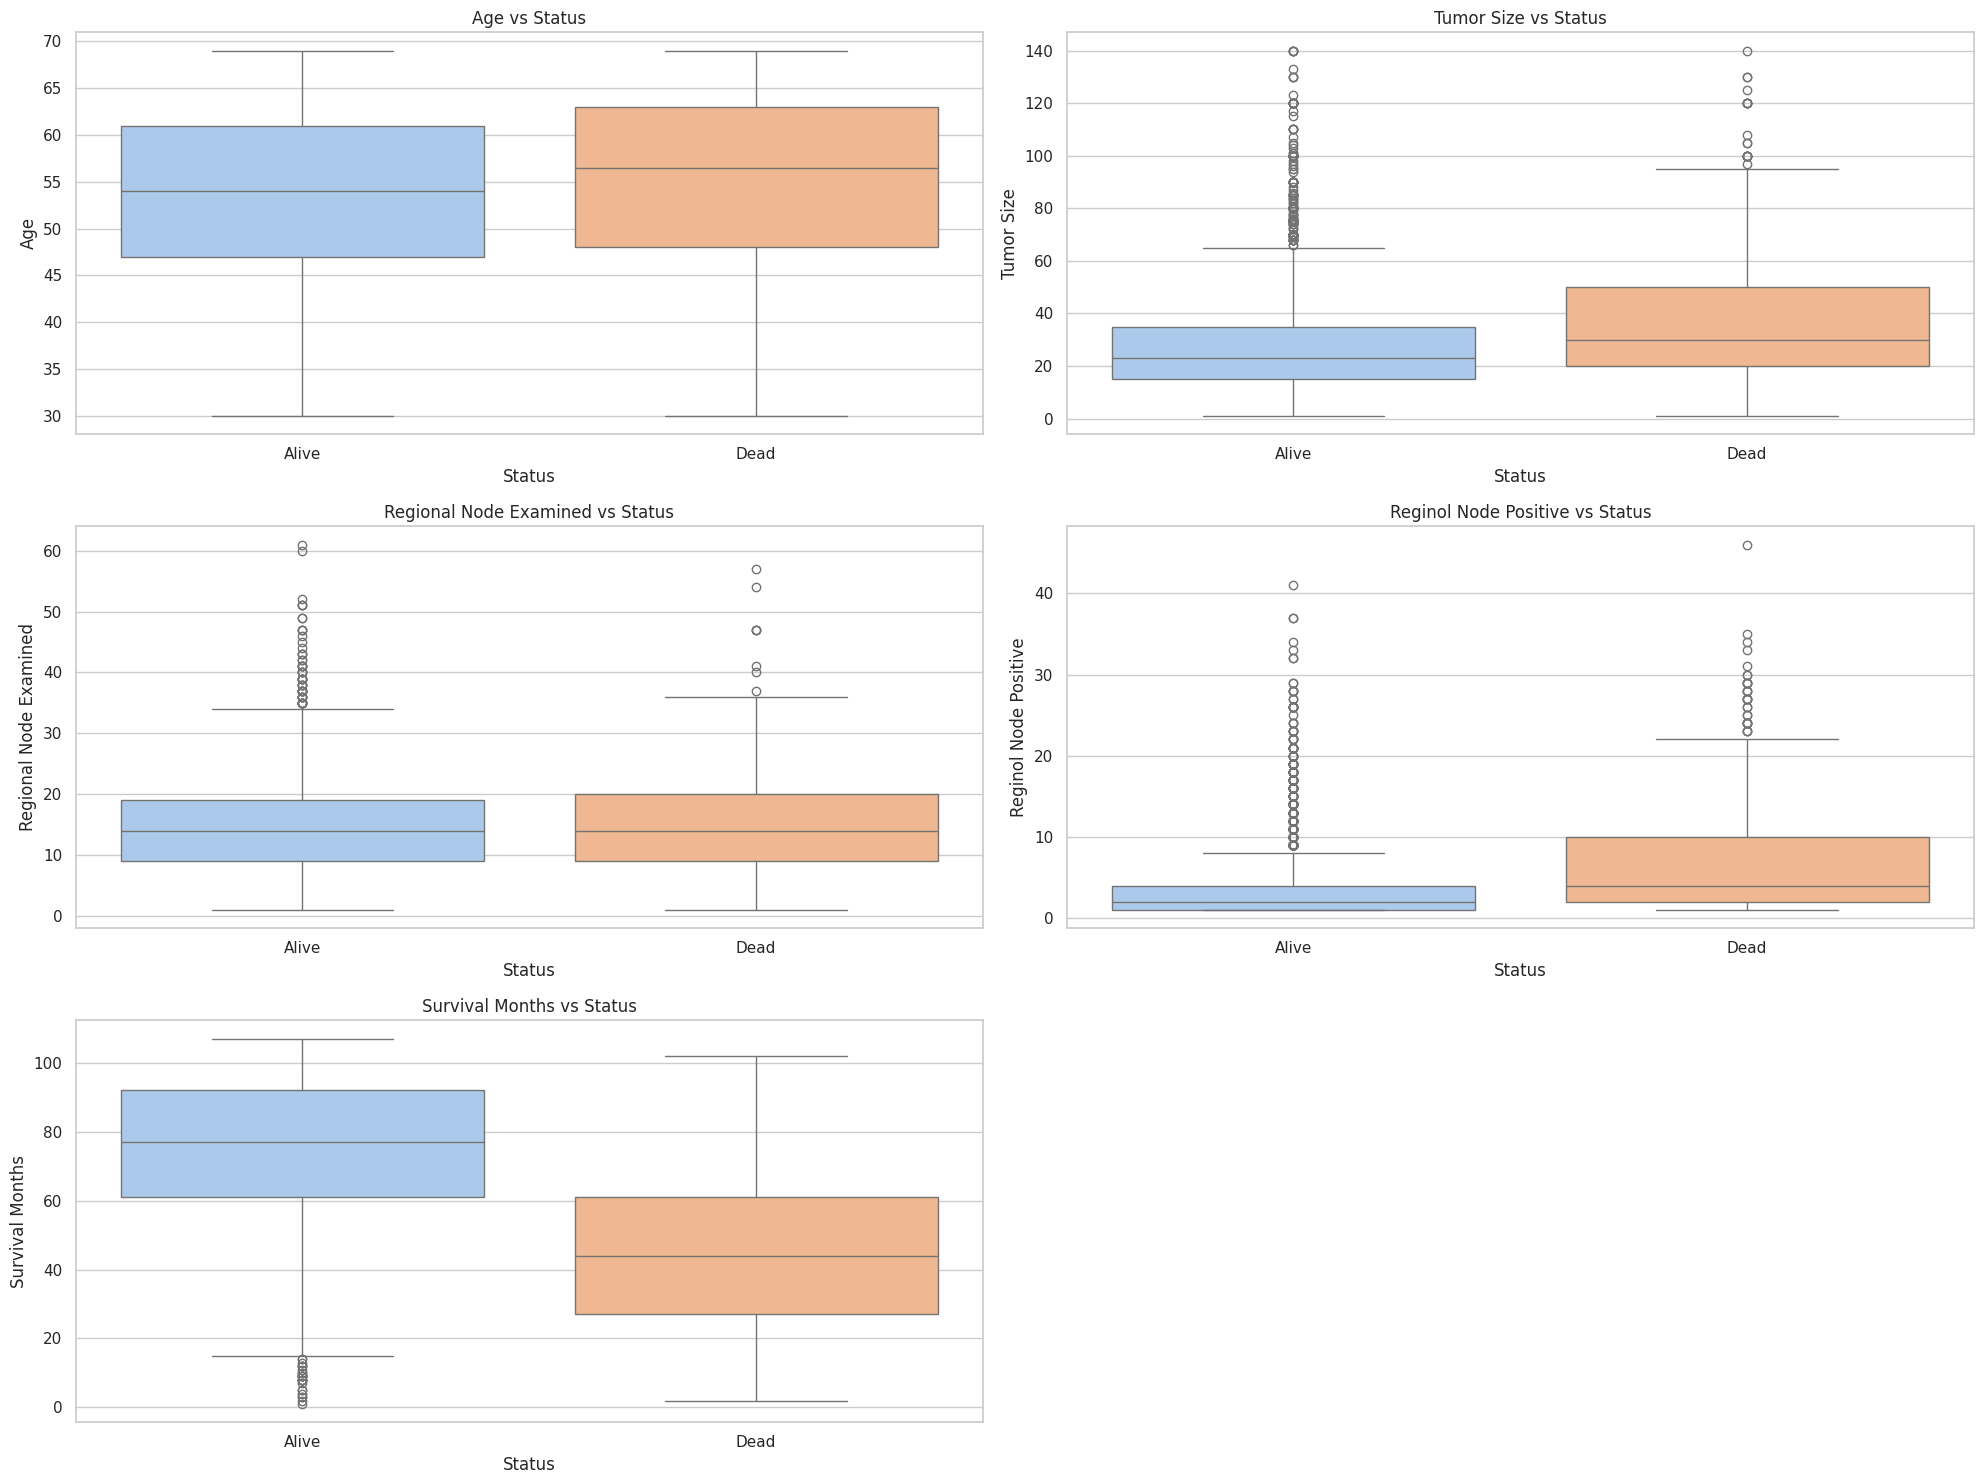

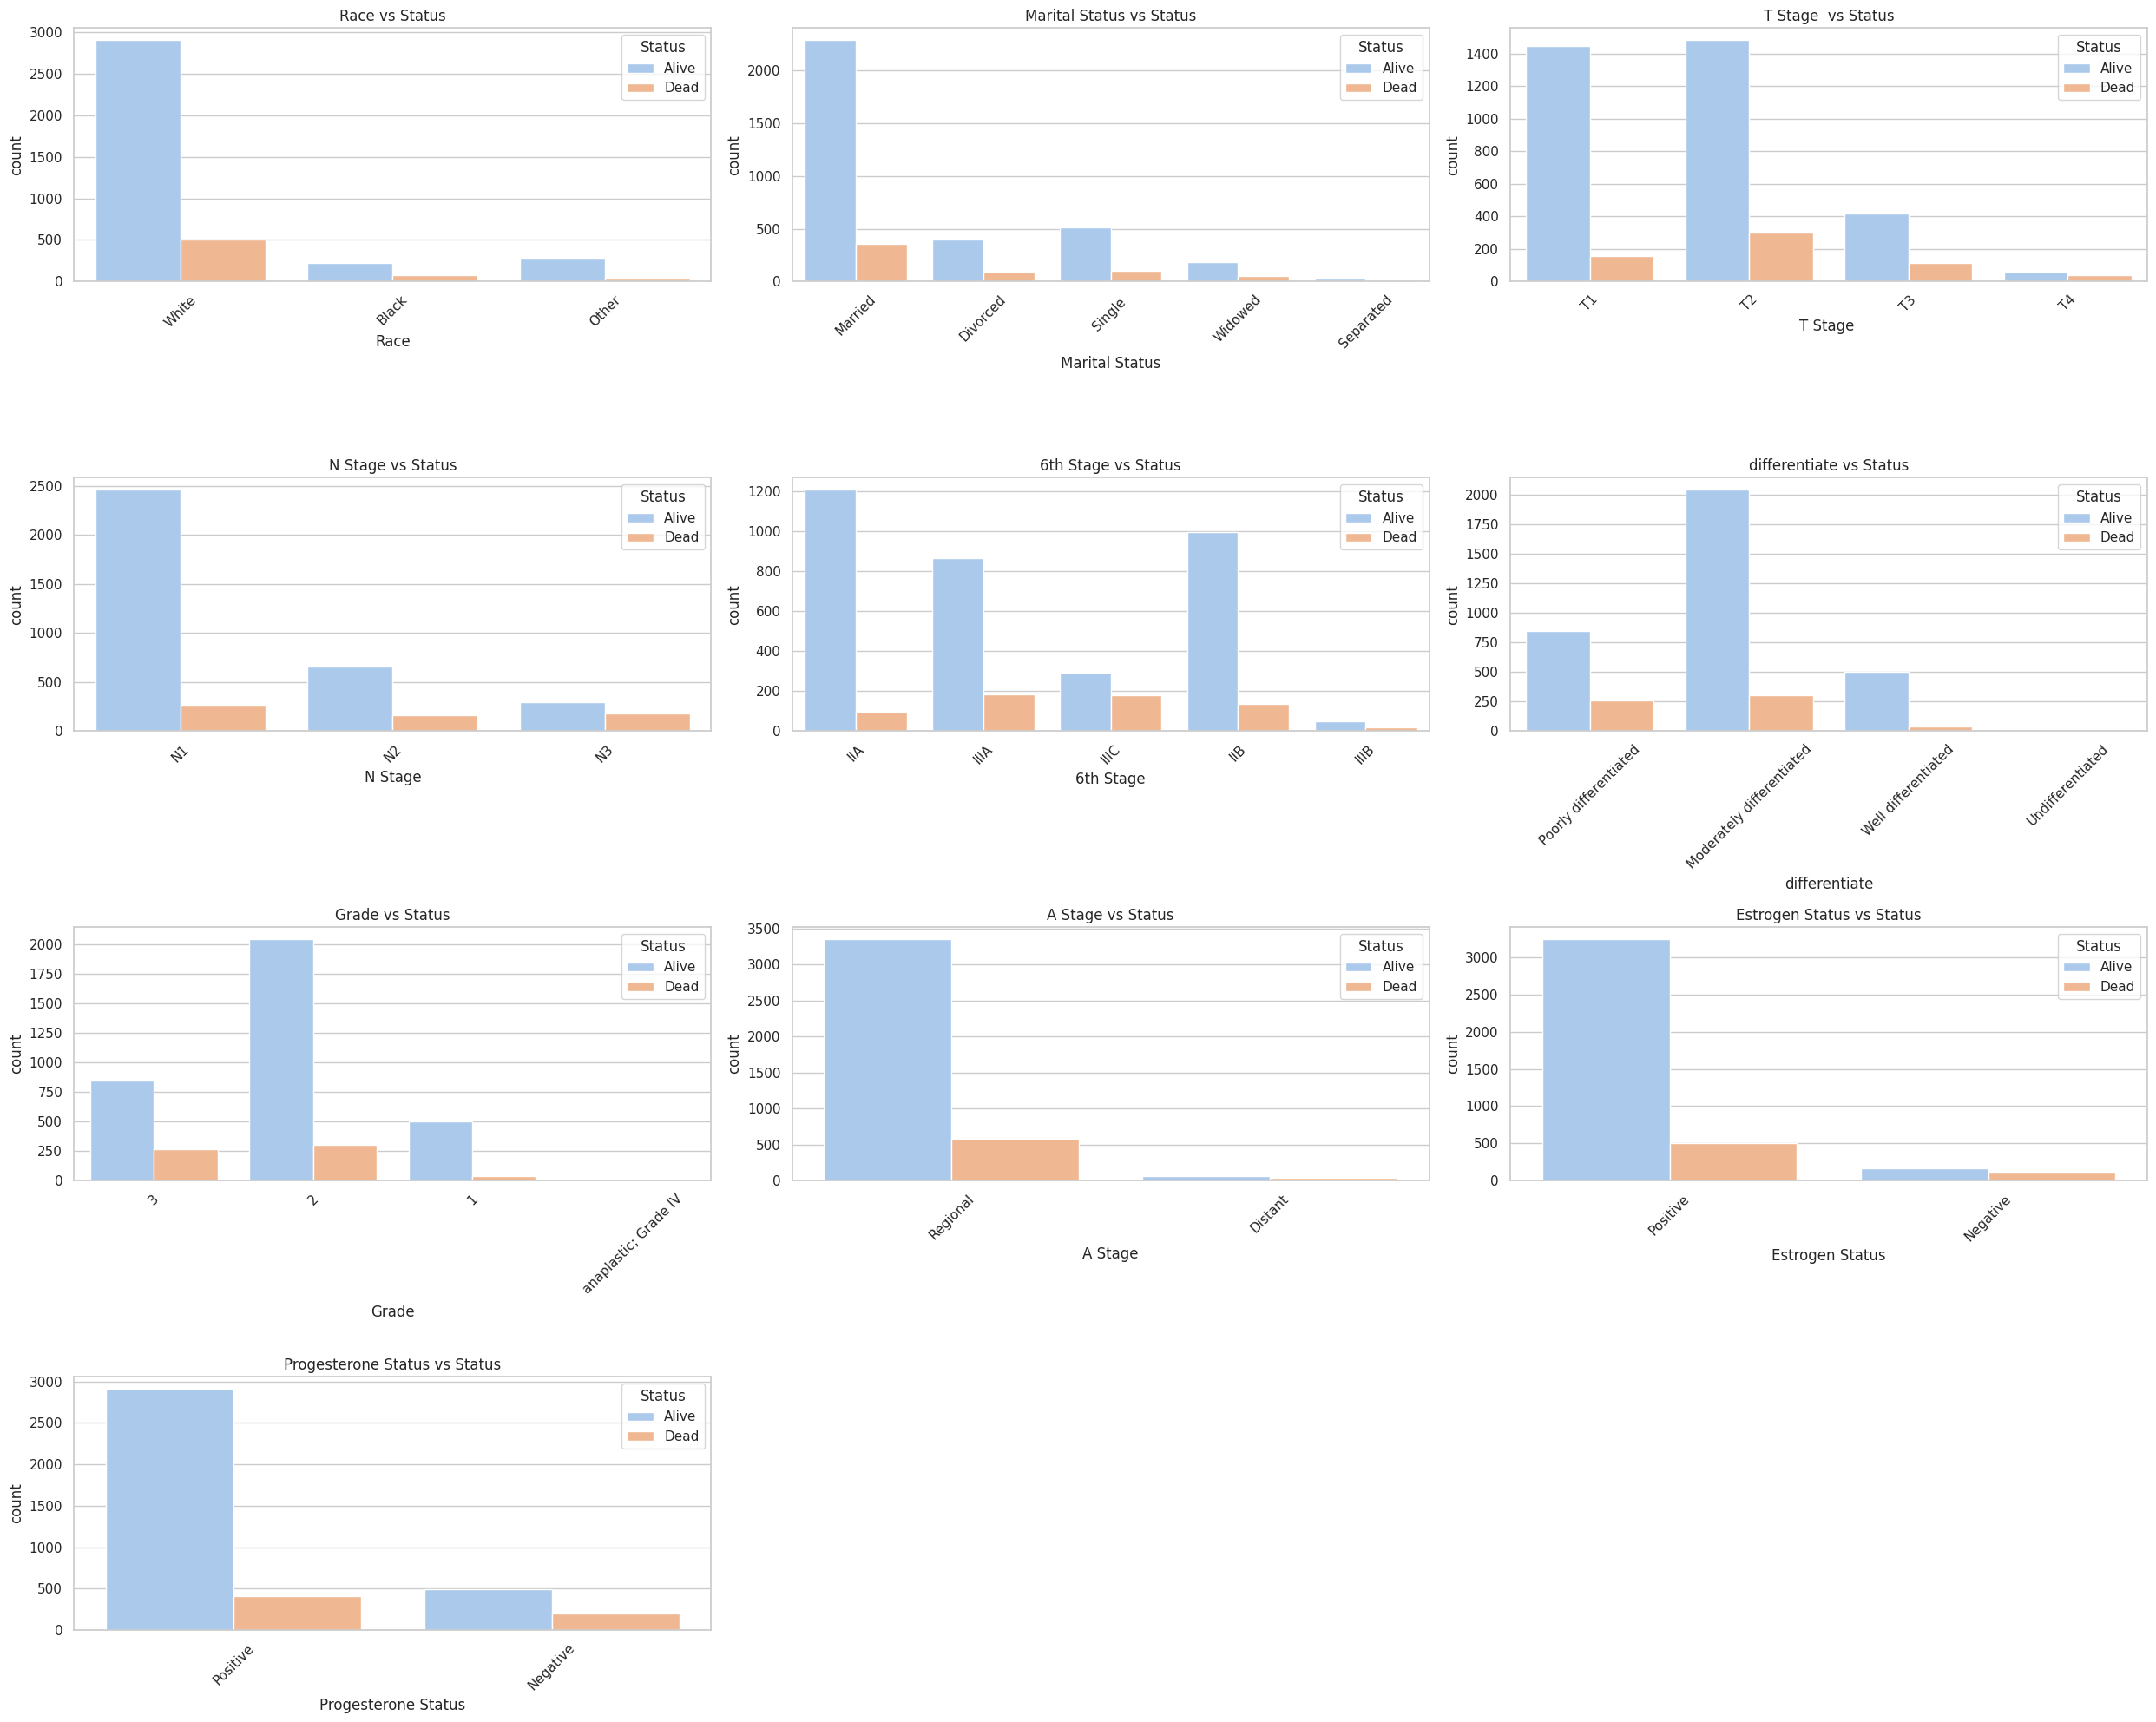

In [ ]:
sns.set_theme(style="whitegrid")

numerical_columns = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']
categorical_columns = ['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate',
                       'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status']

# Bivariate analysis (Numerical)
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Status', y=col, data=df, palette='pastel')
    plt.title(f'{col} vs Status')
plt.tight_layout()
plt.show()

# Bivariate analysis (categorical)
plt.figure(figsize=(25, 20))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(x=col, hue='Status', data=df, palette='pastel')
    plt.title(f'{col} vs Status')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Distribution of Age against having breast cancer')

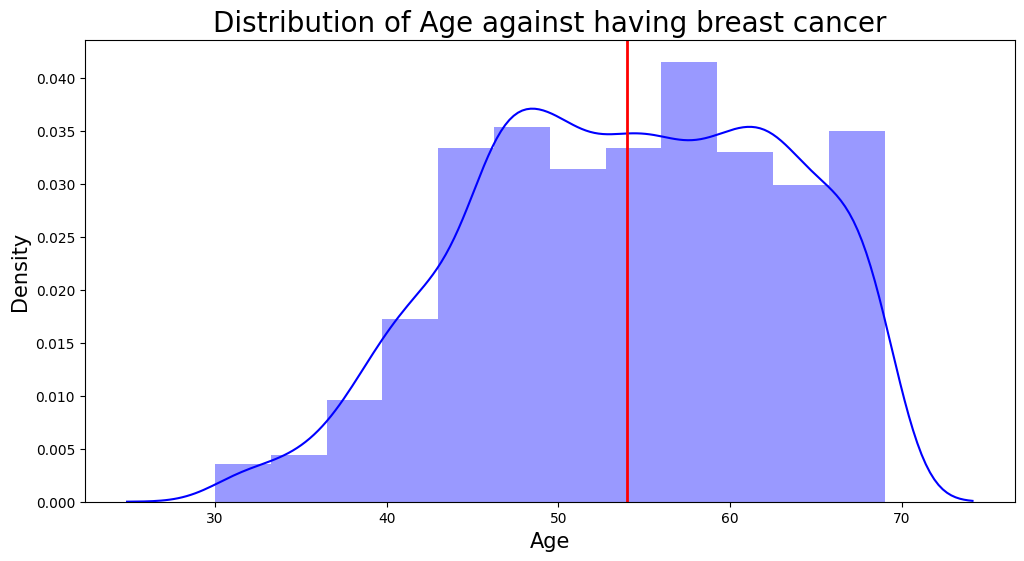

In [ ]:
plt.figure(figsize=(12,6))
median_age = df.Age.median()
sns.distplot(df.Age, color= 'b', kde =True, bins=12)
plt.axvline(median_age
            ,color='red',linewidth=2,label='Median Age')
plt.xlabel('Age',fontdict={'fontsize':15})
plt.ylabel('Density',fontdict={'fontsize':15})
plt.title("Distribution of Age against having breast cancer",fontdict={'fontsize':20})

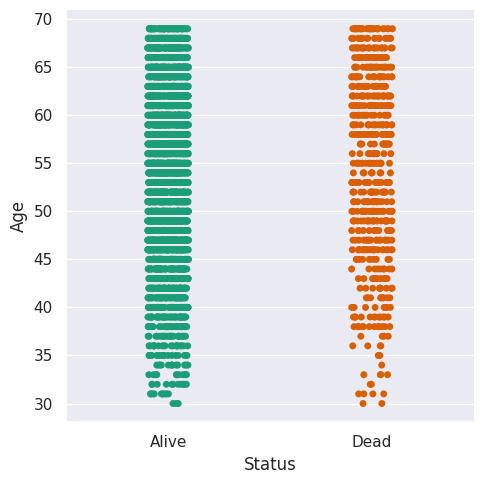

In [ ]:
#don't have much difference when we look at our Target variable
sns.catplot(x = "Status", y = "Age", palette = "Dark2", data = df)

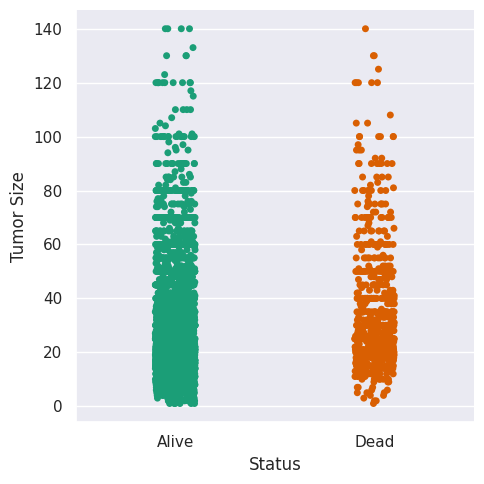

In [ ]:
#don't have much difference when we look at our Target variable
sns.catplot(x = "Status", y = "Tumor Size", palette = "Dark2", data = df)

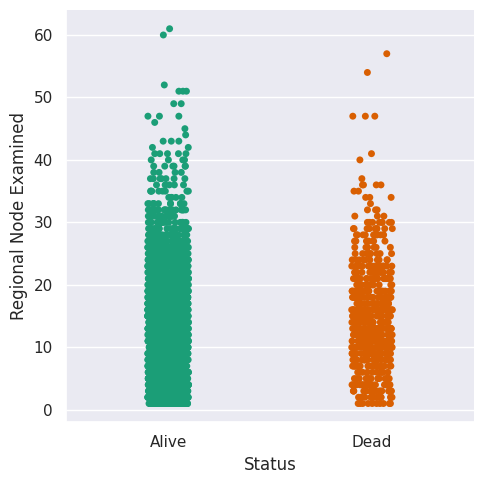

In [ ]:
#people with higher levels are less likely to die.
sns.catplot(x = "Status", y = "Regional Node Examined", palette = "Dark2", data = df)

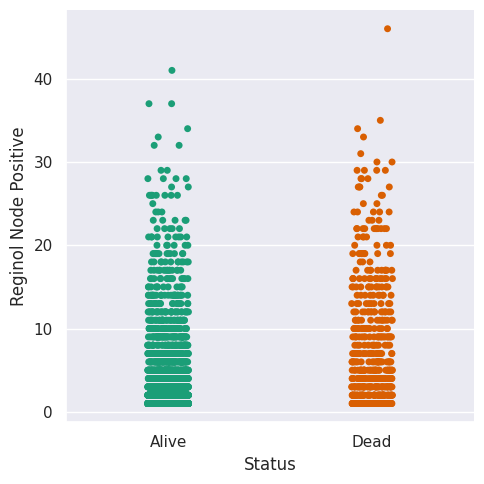

In [ ]:
#people with higher levels are less likely to die.
sns.catplot(x = "Status", y = "Reginol Node Positive", palette = "Dark2", data = df)

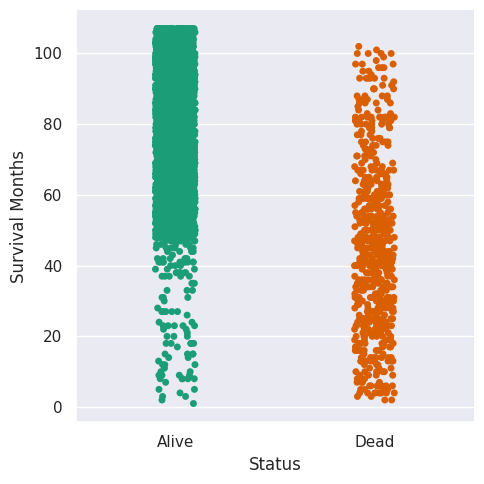

In [ ]:
#people with higher values are less likely to die.
sns.catplot(x = "Status", y = "Survival Months", palette = "Dark2", data = df)

In [ ]:
#Dataset encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])
    else:
        df[col] = df[col].astype('int')
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,1,1,0,0,0,0,2,1,9,1,1,1,1,49,0
4020,56,2,0,1,1,2,0,2,1,46,1,1,14,8,69,0
4021,68,2,1,1,0,1,0,2,1,22,1,0,11,3,69,0
4022,58,0,0,1,0,1,0,2,1,44,1,1,11,1,72,0


<Axes: >

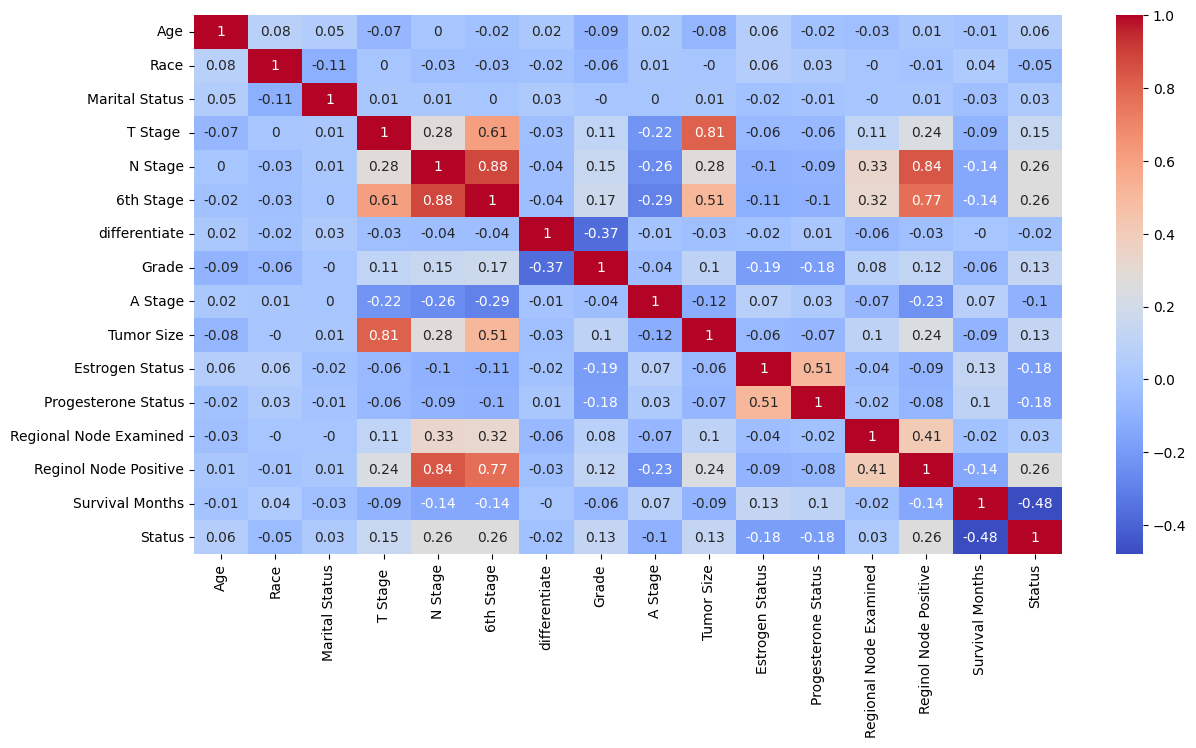

In [ ]:
#Checking correlation of dataset
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

In [ ]:
X=df.drop('Status', axis=1)
y=df['Status']

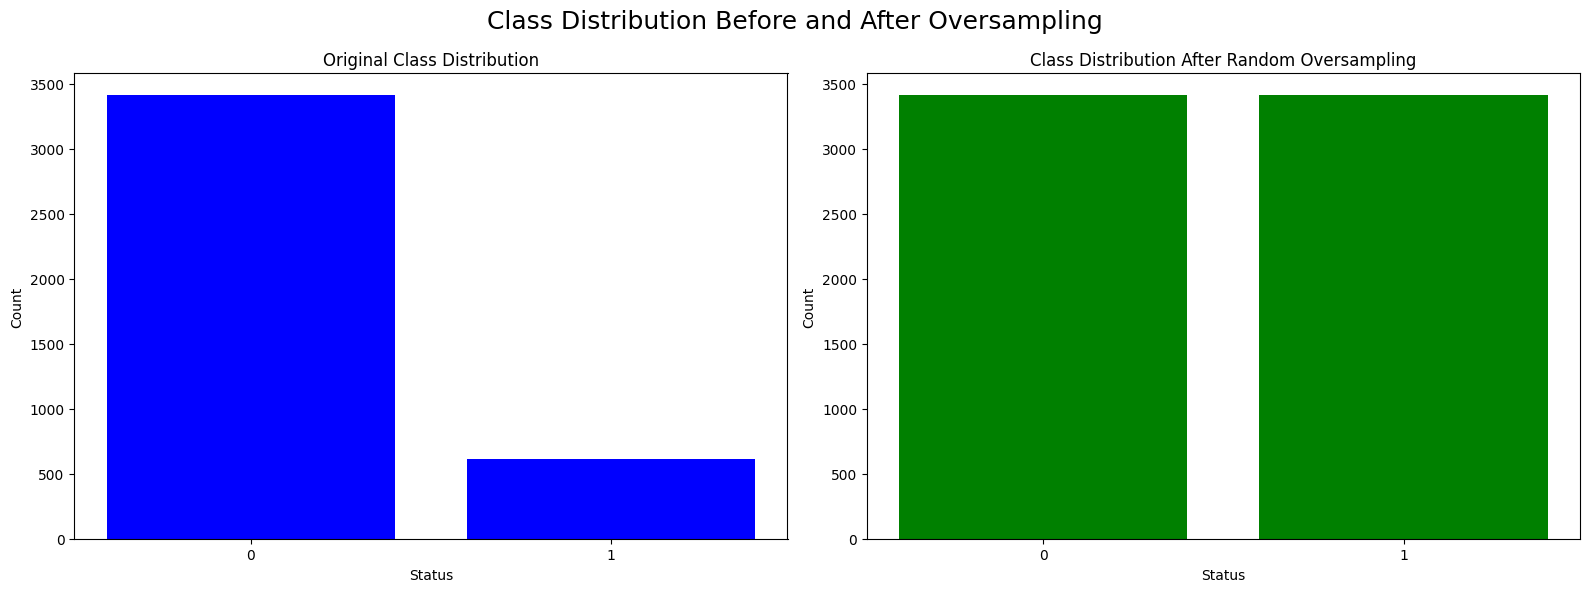

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split



# Class distribution before oversampling
fig, axs = plt.subplots(1, 2, figsize=(16, 6))


axs[0].bar([0, 1], y.value_counts().sort_index().values, color='blue')
axs[0].set_title("Original Class Distribution")
axs[0].set_xlabel("Status")
axs[0].set_ylabel("Count")
axs[0].set_xticks([0, 1])

#Random Oversampling
random_over_sampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = random_over_sampler.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#Class distribution after oversampling
axs[1].bar([0, 1], y_resampled.value_counts().sort_index().values, color='green')
axs[1].set_title("Class Distribution After Random Oversampling")
axs[1].set_xlabel("Status")
axs[1].set_ylabel("Count")
axs[1].set_xticks([0, 1])


fig.suptitle("Class Distribution Before and After Oversampling", fontsize=18)


plt.tight_layout()
plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Applying PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


print(f"Number of components retained: {pca.n_components_}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

X_train, X_test = X_train_pca, X_test_pca

Number of components retained: 12
Explained variance ratio: [0.25362277 0.11285879 0.09322998 0.08311446 0.07567419 0.0705888
 0.06243728 0.05529217 0.05041342 0.04740488 0.0401918  0.02617366]


In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00


In [ ]:
#Importing Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import catboost
from catboost import CatBoostClassifier

In [ ]:
Model_RF = RandomForestClassifier()
Model_SVC = SVC()
Model_XGB=XGBClassifier()
Model_GBoosting=GradientBoostingClassifier()
Model_KNN = KNeighborsClassifier(n_neighbors=5)


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def predict(model, X_train, y_train, X_test, y_test,
            show_confusion_matrix=True, cross_val=False,
            grid_search=False, param_grid=None, cv_folds=5):
    # Cross-validation
    if cross_val:
        print(f"Performing cross-validation for {model.__class__.__name__}...")

        cv_accuracy = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='accuracy')
        cv_precision = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring=make_scorer(precision_score, average='weighted'))
        cv_recall = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring=make_scorer(recall_score, average='weighted'))
        cv_f1 = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring=make_scorer(f1_score, average='weighted'))

        print(f"Cross-validation Accuracy Scores: {cv_accuracy}")
        print(f"Mean CV Accuracy: {cv_accuracy.mean():.4f}")
        print(f"Cross-validation Precision Scores: {cv_precision}")
        print(f"Mean CV Precision: {cv_precision.mean():.4f}")
        print(f"Cross-validation Recall Scores: {cv_recall}")
        print(f"Mean CV Recall: {cv_recall.mean():.4f}")
        print(f"Cross-validation F1 Scores: {cv_f1}")
        print(f"Mean CV F1: {cv_f1.mean():.4f}")

        return {
            "Cross-validation Accuracy": cv_accuracy.mean(),
            "Cross-validation Precision": cv_precision.mean(),
            "Cross-validation Recall": cv_recall.mean(),
            "Cross-validation F1": cv_f1.mean(),
        }

    # Grid Search CV
    if grid_search and param_grid:
        print(f"Performing GridSearchCV for {model.__class__.__name__}...")

        # Define scoring metrics
        scoring = {
            'precision': make_scorer(precision_score, average='weighted'),
            'recall': make_scorer(recall_score, average='weighted'),
            'f1': make_scorer(f1_score, average='weighted')
        }

        # Perform GridSearchCV
        grid_search = GridSearchCV(model, param_grid, scoring=scoring, refit='f1', cv=cv_folds)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Best Accuracy Score: {grid_search.best_score_:.4f}")

        # Extract cross-validated metrics
        results = grid_search.cv_results_
        mean_precision = results['mean_test_precision'].mean()
        mean_recall = results['mean_test_recall'].mean()
        mean_f1 = results['mean_test_f1'].mean()

        print(f"  Precision (CV): {mean_precision:.4f}")
        print(f"  Recall (CV): {mean_recall:.4f}")
        print(f"  F1 Score (CV): {mean_f1:.4f}")

        return {
            "Best Parameters": grid_search.best_params_,
            "Best CV Accuracy": grid_search.best_score_,
            "Mean CV Precision": mean_precision,
            "Mean CV Recall": mean_recall,
            "Mean CV F1 Score": mean_f1
        }

    # Train the model
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    if show_confusion_matrix:
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp.plot(cmap='Blues', values_format='.2f')
        plt.title(f"Confusion Matrix for {model.__class__.__name__}")
        plt.show()

    #Classification report metrics
    metrics = classification_report(y_test, y_pred, output_dict=True)
    return metrics


              precision    recall  f1-score   support

           0       1.00      0.95      0.98       679
           1       0.95      1.00      0.98       685

    accuracy                           0.98      1364
   macro avg       0.98      0.98      0.98      1364
weighted avg       0.98      0.98      0.98      1364



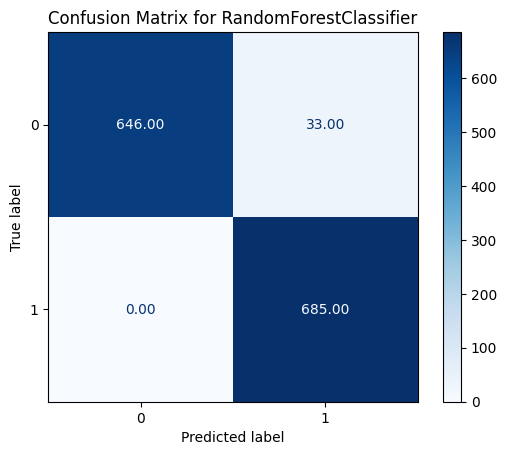

In [ ]:
#Basic RF algorithm
metrics_rf = predict(Model_RF, X_train, y_train, X_test, y_test)

In [ ]:
#Cross validation with RF algorithm
results_cv_rf = predict( RandomForestClassifier(), X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, cross_val=True, cv_folds=5)

print("Cross-validation results:", results_cv_rf)

Performing cross-validation for RandomForestClassifier...
Cross-validation Accuracy Scores: [0.94958753 0.94867094 0.95504587 0.96697248 0.96055046]
Mean CV Accuracy: 0.9562
Cross-validation Precision Scores: [0.94920764 0.94371975 0.96452888 0.97424105 0.96002189]
Mean CV Precision: 0.9583
Cross-validation Recall Scores: [0.94592117 0.94042163 0.95504587 0.97155963 0.96055046]
Mean CV Recall: 0.9547
Cross-validation F1 Scores: [0.95322631 0.94401085 0.96051852 0.97338368 0.95684808]
Mean CV F1: 0.9576
Cross-validation results: {'Cross-validation Accuracy': 0.9561654571599156, 'Cross-validation Precision': 0.9583438411059377, 'Cross-validation Recall': 0.9546997536138043, 'Cross-validation F1': 0.9575974890348504}


In [ ]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}


In [ ]:
#Hyperparameter tuned RF algorithm
grid_search_results_rf = predict(RandomForestClassifier(), X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, grid_search=True, param_grid=rf_param_grid, cv_folds=5
)

print("GridSearchCV results:", grid_search_results_rf)



Performing GridSearchCV for RandomForestClassifier...
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy Score: 0.9578
  Precision (CV): 0.9388
  Recall (CV): 0.9377
  F1 Score (CV): 0.9376
GridSearchCV results: {'Best Parameters': {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}, 'Best CV Accuracy': 0.9577858587483685, 'Mean CV Precision': 0.9388431053732825, 'Mean CV Recall': 0.9376826741389175, 'Mean CV F1 Score': 0.9376459666059772}


              precision    recall  f1-score   support

           0       0.91      0.97      0.94       685
           1       0.71      0.47      0.56       120

    accuracy                           0.89       805
   macro avg       0.81      0.72      0.75       805
weighted avg       0.88      0.89      0.88       805



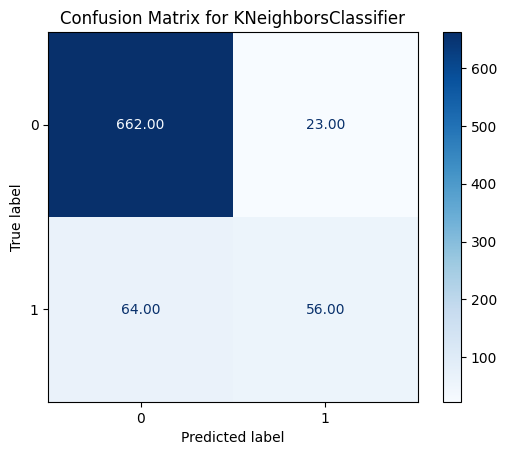

In [ ]:
#Basic KNN algorithm
metrics_knn = predict(KNeighborsClassifier(), X_train, y_train, X_test, y_test)

In [ ]:
#Cross validation with KNN
results_cv_knn = predict( KNeighborsClassifier(), X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, cross_val=True, cv_folds=5)

print("Cross-validation results:", results_cv_knn)

Performing cross-validation for KNeighborsClassifier...
Cross-validation Accuracy Scores: [0.81484876 0.8020165  0.83944954 0.84036697 0.84587156]
Mean CV Accuracy: 0.8285
Cross-validation Precision Scores: [0.82289873 0.81584318 0.85055421 0.8532783  0.8524037 ]
Mean CV Precision: 0.8390
Cross-validation Recall Scores: [0.81484876 0.8020165  0.83944954 0.84036697 0.84587156]
Mean CV Recall: 0.8285
Cross-validation F1 Scores: [0.81370473 0.79985056 0.83816793 0.83892909 0.84517735]
Mean CV F1: 0.8272
Cross-validation results: {'Cross-validation Accuracy': 0.8285106669245452, 'Cross-validation Precision': 0.8389956241163535, 'Cross-validation Recall': 0.8285106669245452, 'Cross-validation F1': 0.8271659312232001}


In [ ]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10],         # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

In [ ]:
#Hyperparameter tuned KNN
grid_search_results_knn = predict(
    KNeighborsClassifier(),
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    grid_search=True,  # Enable GridSearchCV
    param_grid=knn_param_grid,  # Pass the hyperparameter grid
    cv_folds=5
)

print("GridSearchCV results:", grid_search_results_knn)

Performing GridSearchCV for KNeighborsClassifier...
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Accuracy Score: 0.8930
  Precision (CV): 0.8637
  Recall (CV): 0.8502
  F1 Score (CV): 0.8490
GridSearchCV results: {'Best Parameters': {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}, 'Best CV Accuracy': 0.8929628396532852, 'Mean CV Precision': 0.8636639836584968, 'Mean CV Recall': 0.8501973822517849, 'Mean CV F1 Score': 0.8489602889700092}


Learning rate set to 0.021254
0:	learn: 0.6851993	total: 62.8ms	remaining: 1m 2s
1:	learn: 0.6771814	total: 73.8ms	remaining: 36.8s
2:	learn: 0.6694355	total: 83.4ms	remaining: 27.7s
3:	learn: 0.6618855	total: 97ms	remaining: 24.2s
4:	learn: 0.6548988	total: 107ms	remaining: 21.2s
5:	learn: 0.6476896	total: 116ms	remaining: 19.2s
6:	learn: 0.6414857	total: 128ms	remaining: 18.1s
7:	learn: 0.6347230	total: 139ms	remaining: 17.3s
8:	learn: 0.6285602	total: 151ms	remaining: 16.6s
9:	learn: 0.6229392	total: 164ms	remaining: 16.2s
10:	learn: 0.6167016	total: 176ms	remaining: 15.8s
11:	learn: 0.6116195	total: 186ms	remaining: 15.3s
12:	learn: 0.6064793	total: 190ms	remaining: 14.4s
13:	learn: 0.6006244	total: 199ms	remaining: 14s
14:	learn: 0.5956700	total: 211ms	remaining: 13.8s
15:	learn: 0.5903873	total: 221ms	remaining: 13.6s
16:	learn: 0.5856021	total: 233ms	remaining: 13.5s
17:	learn: 0.5804262	total: 244ms	remaining: 13.3s
18:	learn: 0.5755847	total: 255ms	remaining: 13.2s
19:	learn: 

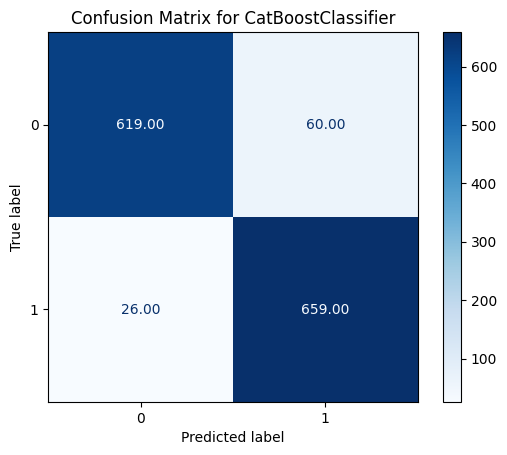

In [ ]:
#Basic CatBoost
metrics_catbost = predict(CatBoostClassifier(), X_train, y_train, X_test, y_test)

In [ ]:
#Cross Validation CatBoost
cv_results_catboost = predict(CatBoostClassifier(), X_train, y_train, X_test, y_test, cross_val=True, cv_folds=5)

print("Cross-validation results:", cv_results_catboost)

Streaming output truncated to the last 5000 lines.
13:	learn: 0.6048333	total: 105ms	remaining: 7.43s
14:	learn: 0.6000511	total: 110ms	remaining: 7.2s
15:	learn: 0.5950656	total: 116ms	remaining: 7.13s
16:	learn: 0.5895553	total: 124ms	remaining: 7.15s
17:	learn: 0.5850135	total: 130ms	remaining: 7.11s
18:	learn: 0.5806201	total: 137ms	remaining: 7.09s
19:	learn: 0.5758281	total: 144ms	remaining: 7.07s
20:	learn: 0.5719473	total: 149ms	remaining: 6.93s
21:	learn: 0.5679655	total: 154ms	remaining: 6.84s
22:	learn: 0.5633852	total: 159ms	remaining: 6.73s
23:	learn: 0.5593455	total: 163ms	remaining: 6.64s
24:	learn: 0.5555520	total: 168ms	remaining: 6.54s
25:	learn: 0.5522655	total: 172ms	remaining: 6.46s
26:	learn: 0.5488459	total: 181ms	remaining: 6.53s
27:	learn: 0.5451845	total: 192ms	remaining: 6.65s
28:	learn: 0.5423823	total: 202ms	remaining: 6.78s
29:	learn: 0.5392694	total: 212ms	remaining: 6.86s
30:	learn: 0.5364586	total: 222ms	remaining: 6.92s
31:	learn: 0.5341434	total: 231m

In [ ]:
catboost_param_grid = {
    'iterations': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8]
}

In [ ]:
# Hyperparameter tuned CatBoost
grid_search_results_Catboost = predict(CatBoostClassifier(),
                                  X_train, y_train, X_test, y_test,
                                  grid_search=True, param_grid=catboost_param_grid)


print(grid_search_results_Catboost)

Streaming output truncated to the last 5000 lines.
6:	learn: 0.5557277	total: 75.5ms	remaining: 5.31s
7:	learn: 0.5418677	total: 85.3ms	remaining: 5.24s
8:	learn: 0.5314609	total: 94.6ms	remaining: 5.16s
9:	learn: 0.5186187	total: 104ms	remaining: 5.09s
10:	learn: 0.5080183	total: 113ms	remaining: 5.04s
11:	learn: 0.4985947	total: 123ms	remaining: 4.99s
12:	learn: 0.4887276	total: 135ms	remaining: 5.06s
13:	learn: 0.4790624	total: 146ms	remaining: 5.08s
14:	learn: 0.4697961	total: 155ms	remaining: 5.03s
15:	learn: 0.4632395	total: 168ms	remaining: 5.08s
16:	learn: 0.4555633	total: 177ms	remaining: 5.03s
17:	learn: 0.4487752	total: 186ms	remaining: 4.99s
18:	learn: 0.4406271	total: 200ms	remaining: 5.07s
19:	learn: 0.4325383	total: 217ms	remaining: 5.2s
20:	learn: 0.4260233	total: 228ms	remaining: 5.19s
21:	learn: 0.4213595	total: 237ms	remaining: 5.15s
22:	learn: 0.4162745	total: 247ms	remaining: 5.11s
23:	learn: 0.4111703	total: 256ms	remaining: 5.08s
24:	learn: 0.4056560	total: 265ms

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       679
           1       0.85      0.86      0.86       685

    accuracy                           0.86      1364
   macro avg       0.86      0.86      0.86      1364
weighted avg       0.86      0.86      0.86      1364



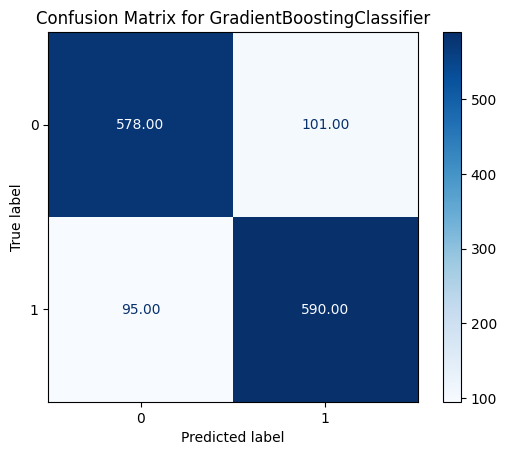

In [ ]:
#Basic Graidient Boosting
metrics_gboosting = predict(Model_GBoosting, X_train, y_train, X_test, y_test)

In [ ]:
#Cross validation Gradient Boosting
cv_results_gboosting = predict(Model_GBoosting, X_train, y_train, X_test, y_test, cross_val=True, cv_folds=5)

Performing cross-validation for GradientBoostingClassifier...
Cross-validation Accuracy Scores: [0.8203483  0.84234647 0.83853211 0.85504587 0.8440367 ]
Mean CV Accuracy: 0.8401
Cross-validation Precision Scores: [0.82045901 0.84301675 0.83860507 0.85535992 0.84496302]
Mean CV Precision: 0.8405
Cross-validation Recall Scores: [0.8203483  0.84234647 0.83853211 0.85504587 0.8440367 ]
Mean CV Recall: 0.8401
Cross-validation F1 Scores: [0.82033472 0.84227333 0.83852341 0.85501854 0.84403565]
Mean CV F1: 0.8400


In [ ]:

gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}


In [ ]:
# Hyperparameter tuned Gradient Boosting
grid_search_results_gboosting = predict(GradientBoostingClassifier(),
                                  X_train, y_train, X_test, y_test,
                                  grid_search=True, param_grid=gb_param_grid)


print(grid_search_results_gboosting)

Performing GridSearchCV for GradientBoostingClassifier...
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 0.8}
Best Accuracy Score: 0.9593
  Precision (CV): 0.8798
  Recall (CV): 0.8785
  F1 Score (CV): 0.8784
{'Best Parameters': {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 0.8}, 'Best CV Accuracy': 0.9592566882453323, 'Mean CV Precision': 0.8798157019999184, 'Mean CV Recall': 0.878506566197824, 'Mean CV F1 Score': 0.8784365270524284}


              precision    recall  f1-score   support

           0       0.81      0.86      0.83       679
           1       0.85      0.80      0.82       685

    accuracy                           0.83      1364
   macro avg       0.83      0.83      0.83      1364
weighted avg       0.83      0.83      0.83      1364



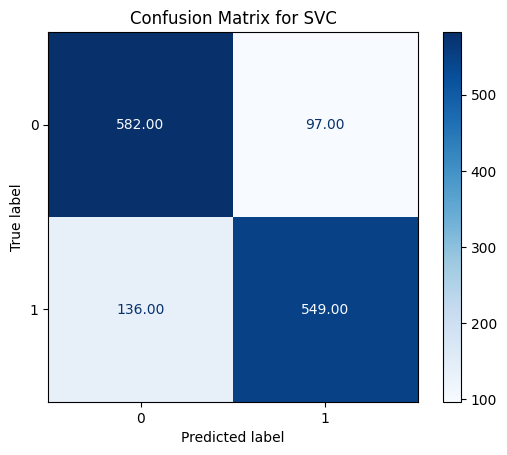

In [ ]:
#Basic SVC
metrics_svc = predict(Model_SVC, X_train, y_train, X_test, y_test)

In [ ]:
#Cross validation SVC
cv_results_svc = predict(Model_SVC, X_train, y_train, X_test, y_test, cross_val=True, cv_folds=5)

Performing cross-validation for SVC...
Cross-validation Accuracy Scores: [0.8111824  0.80843263 0.79633028 0.82018349 0.81009174]
Mean CV Accuracy: 0.8092
Cross-validation Precision Scores: [0.81238531 0.80845694 0.79762891 0.82079115 0.81238567]
Mean CV Precision: 0.8103
Cross-validation Recall Scores: [0.8111824  0.80843263 0.79633028 0.82018349 0.81009174]
Mean CV Recall: 0.8092
Cross-validation F1 Scores: [0.81099343 0.8084278  0.79610787 0.82008899 0.80972288]
Mean CV F1: 0.8091


In [ ]:

svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}


In [ ]:
# Hyperparamter tuned SVC
grid_search_results_svc = predict(SVC(probability=True),
                                  X_train, y_train, X_test, y_test,
                                  grid_search=True, param_grid=svc_param_grid)

print(grid_search_results_svc)

Performing GridSearchCV for SVC...
Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Best Accuracy Score: 0.8461
  Precision (CV): 0.7905
  Recall (CV): 0.7837
  F1 Score (CV): 0.7817
{'Best Parameters': {'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}, 'Best CV Accuracy': 0.846062779958503, 'Mean CV Precision': 0.7905422247729549, 'Mean CV Recall': 0.7837433603264968, 'Mean CV F1 Score': 0.7817396423814069}
